# Import thư viện

In [ ]:
import pandas as pd #đọc dữ liệu
import numpy as np #xử lý dữ liệu
from vnstock import * #lấy dữ liệu
import math
import matplotlib.pyplot as plt #vẽ biểu đồ
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tải mô hình

#các lớp để xây dựng mô hình
from keras.models import Sequential #đầu vào
from keras.layers import LSTM #học phụ thuộc
from keras.layers import Dropout #tránh học tủ
from keras.layers import Dense #đầu ra

#kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error #đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #đo % sai số tuyệt đối trung bình

# Đọc dữ liệu

In [ ]:
pip install vnstock

In [ ]:
#Truy xuất dữ liệu giá lịch sử
df =  stock_historical_data(symbol='VNM',
                            start_date="2021-01-01",
                            end_date='2024-01-15',
                            resolution='1D', type='stock', source='DNSE')
df

,time,open,high,low,close,volume,ticker
0,2021-01-04,93480,93560,92880,93140,2299600,VNM
1,2021-01-05,93650,96310,93220,95290,4013900,VNM
2,2021-01-06,95460,95720,94420,94420,2823100,VNM
3,2021-01-07,94610,95290,94420,94950,2453000,VNM
4,2021-01-08,95890,97080,95370,96310,3323000,VNM
...,...,...,...,...,...,...,...
754,2024-01-09,67330,67630,67130,67230,2460400,VNM
755,2024-01-10,67230,67230,66540,66640,3006600,VNM
756,2024-01-11,66640,67630,66640,67030,2083900,VNM
757,2024-01-12,66740,67030,66140,66340,3283000,VNM


# Mô tả dữ liệu

In [ ]:
#Kích thước dữ liệu
df.shape

(759, 7)

In [ ]:
#Dữ liệu 5 dòng đầu
df.head()

,time,open,high,low,close,volume,ticker
0,2021-01-04,93480,93560,92880,93140,2299600,VNM
1,2021-01-05,93650,96310,93220,95290,4013900,VNM
2,2021-01-06,95460,95720,94420,94420,2823100,VNM
3,2021-01-07,94610,95290,94420,94950,2453000,VNM
4,2021-01-08,95890,97080,95370,96310,3323000,VNM


In [ ]:
#Xác định kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    759 non-null    object
 1   open    759 non-null    int64 
 2   high    759 non-null    int64 
 3   low     759 non-null    int64 
 4   close   759 non-null    int64 
 5   volume  759 non-null    int64 
 6   ticker  759 non-null    object
dtypes: int64(5), object(2)
memory usage: 41.6+ KB


In [ ]:
#Mô tả bộ dữ liệu
df.describe()

,open,high,low,close,volume
count,759.000000,759.000000,759.000000,759.000000,7.590000e+02
mean,73601.140975,74297.289855,72912.346509,73533.445323,2.670350e+06
std,7327.875723,7343.485885,7219.195373,7284.461798,1.419381e+06
min,58620.000000,59890.000000,58080.000000,58080.000000,2.628000e+05
25%,68205.000000,68675.000000,67620.000000,68115.000000,1.633400e+06
50%,72590.000000,73300.000000,71990.000000,72640.000000,2.460400e+06
75%,77285.000000,78105.000000,76540.000000,77125.000000,3.283550e+06
max,100190.000000,100790.000000,99250.000000,100020.000000,1.195800e+07


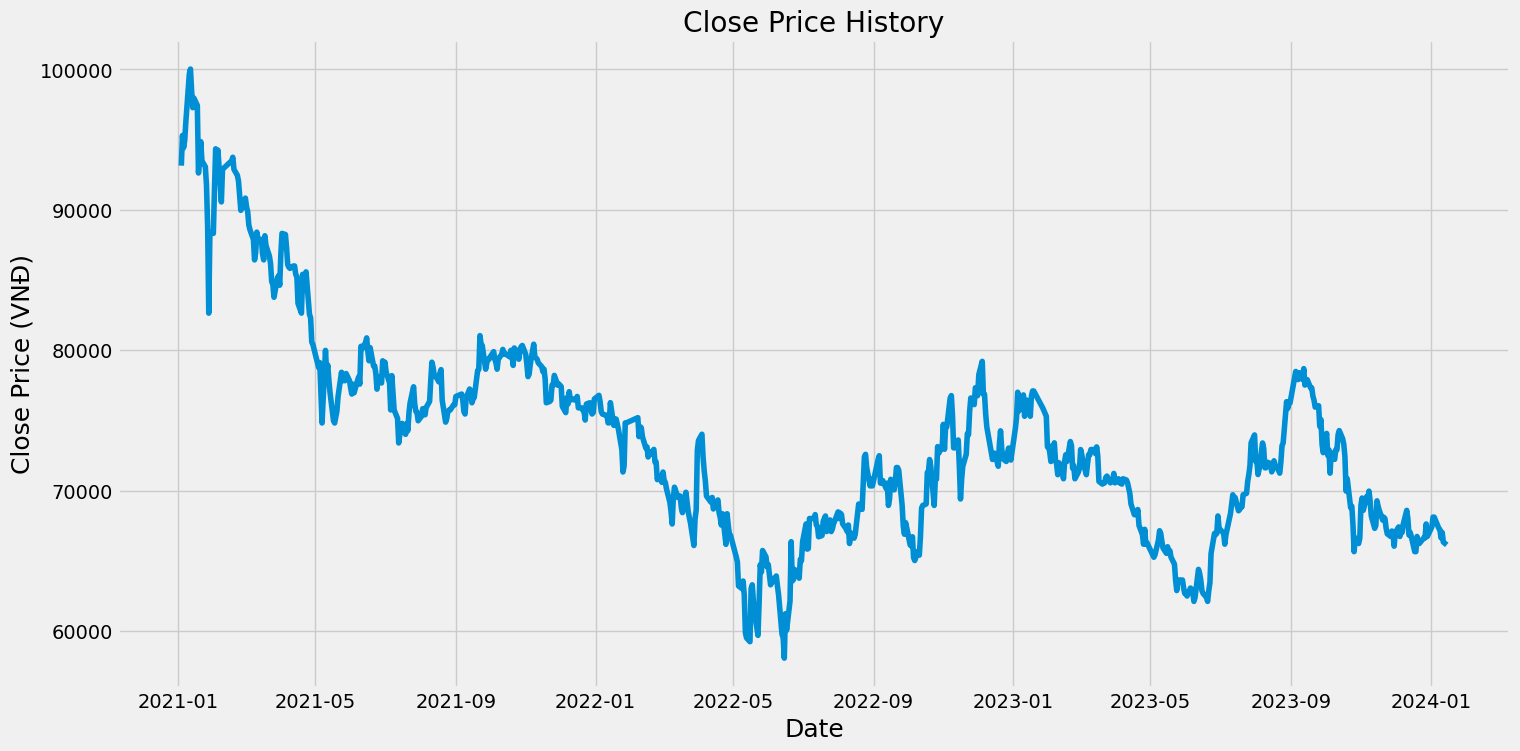

In [ ]:
#Visualize
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['time'], df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (VNĐ)', fontsize=18)
plt.show()

In [ ]:
data = pd.DataFrame(df,columns=['time','close'])
data.index = data.time
data.drop('time',axis=1,inplace=True)
data

,close
time,
2021-01-04,93140
2021-01-05,95290
2021-01-06,94420
2021-01-07,94950
2021-01-08,96310
...,...
2024-01-09,67230
2024-01-10,66640
2024-01-11,67030


In [ ]:
dataset = data.values
dataset

array([[ 93140],
       [ 95290],
       [ 94420],
       [ 94950],
       [ 96310],
       [ 99670],
       [100020],
       [ 98470],
       [ 97270],
       [ 97950],
       [ 97430],
       [ 92620],
       [ 93740],
       [ 94850],
       [ 93490],
       [ 93060],
       [ 91760],
       [ 88830],
       [ 82640],
       [ 88410],
       [ 88320],
       [ 91500],
       [ 94340],
       [ 93570],
       [ 94250],
       [ 90560],
       [ 92880],
       [ 93490],
       [ 93740],
       [ 92880],
       [ 92450],
       [ 92030],
       [ 90980],
       [ 89960],
       [ 90120],
       [ 90830],
       [ 90210],
       [ 89880],
       [ 88920],
       [ 88580],
       [ 87890],
       [ 86430],
       [ 86950],
       [ 88410],
       [ 87890],
       [ 87890],
       [ 86860],
       [ 86430],
       [ 88150],
       [ 87460],
       [ 86700],
       [ 86170],
       [ 84880],
       [ 84690],
       [ 83770],
       [ 85140],
       [ 85310],
       [ 84630],
       [ 86860

In [ ]:
#Chia tập train, test
training_data_len = math.ceil(len(dataset) * .8) #Chia tập dữ liệu (80-20)
training_data_len

608

In [ ]:
#Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.83595613],
       [0.88721984],
       [0.86647592],
       [0.87911302],
       [0.9115403 ],
       [0.99165474],
       [1.        ],
       [0.96304244],
       [0.93443014],
       [0.95064378],
       [0.93824511],
       [0.82355746],
       [0.85026228],
       [0.87672866],
       [0.84430138],
       [0.83404864],
       [0.80305198],
       [0.73319027],
       [0.58559847],
       [0.72317597],
       [0.72103004],
       [0.79685265],
       [0.86456843],
       [0.84620887],
       [0.86242251],
       [0.77443968],
       [0.8297568 ],
       [0.84430138],
       [0.85026228],
       [0.8297568 ],
       [0.81950405],
       [0.80948975],
       [0.78445398],
       [0.76013352],
       [0.7639485 ],
       [0.78087744],
       [0.76609442],
       [0.75822604],
       [0.73533619],
       [0.72722938],
       [0.7107773 ],
       [0.67596567],
       [0.68836433],
       [0.72317597],
       [0.7107773 ],
       [0.7107773 ],
       [0.68621841],
       [0.675

In [ ]:
#Lấy dữ liệu train
train_data = scaled_data[0:training_data_len, :]
#Tách tập train, test
x_train, y_train=[],[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0]) #lấy 60 giá đóng cửa liên tục
  y_train.append(train_data[i, 0]) #lấy ra giá đóng cửa ngày hôm sau
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.83595613, 0.88721984, 0.86647592, 0.87911302, 0.9115403 ,
       0.99165474, 1.        , 0.96304244, 0.93443014, 0.95064378,
       0.93824511, 0.82355746, 0.85026228, 0.87672866, 0.84430138,
       0.83404864, 0.80305198, 0.73319027, 0.58559847, 0.72317597,
       0.72103004, 0.79685265, 0.86456843, 0.84620887, 0.86242251,
       0.77443968, 0.8297568 , 0.84430138, 0.85026228, 0.8297568 ,
       0.81950405, 0.80948975, 0.78445398, 0.76013352, 0.7639485 ,
       0.78087744, 0.76609442, 0.75822604, 0.73533619, 0.72722938,
       0.7107773 , 0.67596567, 0.68836433, 0.72317597, 0.7107773 ,
       0.7107773 , 0.68621841, 0.67596567, 0.71697663, 0.70052456,
       0.68240343, 0.66976633, 0.63900811, 0.63447783, 0.61254173,
       0.64520744, 0.64926085, 0.63304721, 0.68621841, 0.72103004])]
[0.7191225560324273]

[array([0.83595613, 0.88721984, 0.86647592, 0.87911302, 0.9115403 ,
       0.99165474, 1.        , 0.96304244, 0.93443014, 0.95064378,
       0.93824511, 0.82355746, 0.850

In [ ]:
#Chuyển x_train, y_train thành mảng
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
#Reshape x_train, y_train thành mảng 1 chiều
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)
y_train = np.reshape(y_train,(y_train.shape[0],1))
print(y_train.shape)

(548, 60, 1)
(548, 1)


# Xây dựng và huấn luyện mô hình

In [ ]:
#Xây dựng mô hình
model = Sequential() #tạo lớp mạng cho dữ liệu đầu vào
#2 lớp LSTM
model.add(LSTM(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5)) #loại bỏ 1 số đơn vị tránh học tủ (overfitting)
model.add(Dense(1)) #output đầu ra 1 chiều
#Đo sai số bình phương trung bình có sử dụng trình tối ưu hóa adam
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
#Huấn luyện mô hình
save_model = "/content/drive/MyDrive/dataset/save_model.hdf5"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.03153, saving model to /content/drive/MyDrive/dataset/save_model.hdf5
11/11 - 9s - loss: 0.0315 - 9s/epoch - 795ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: loss improved from 0.03153 to 0.01004, saving model to /content/drive/MyDrive/dataset/save_model.hdf5
11/11 - 3s - loss: 0.0100 - 3s/epoch - 270ms/step
Epoch 3/100

Epoch 3: loss improved from 0.01004 to 0.00648, saving model to /content/drive/MyDrive/dataset/save_model.hdf5
11/11 - 4s - loss: 0.0065 - 4s/epoch - 351ms/step
Epoch 4/100

Epoch 4: loss improved from 0.00648 to 0.00545, saving model to /content/drive/MyDrive/dataset/save_model.hdf5
11/11 - 3s - loss: 0.0054 - 3s/epoch - 249ms/step
Epoch 5/100

Epoch 5: loss improved from 0.00545 to 0.00488, saving model to /content/drive/MyDrive/dataset/save_model.hdf5
11/11 - 3s - loss: 0.0049 - 3s/epoch - 278ms/step
Epoch 6/100

Epoch 6: loss improved from 0.00488 to 0.00472, saving model to /content/drive/MyDrive/dataset/save_model.hdf5
11/11 - 3s - loss: 0.0047 - 3s/epoch - 273ms/step
Epoch 7/100

Epoch 7: loss did not improve from 0.00472
11/11 - 4s - loss: 0.0055 - 4s/epoch - 397ms/step
Epoch 8/100

Epoch 8: loss improved 

In [ ]:
#Tập test
test_data = scaled_data[training_data_len - 60: , :]
#Tạo x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Chuyển x_test về mảng
x_test = np.array(x_test)

In [ ]:
#Reshape dữ liệu
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Xây dựng mô hình dự đoán giá cổ phiếu
final_model = load_model("/content/drive/MyDrive/dataset/save_model.hdf5")
predictions = final_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 [==============================] - 1s 36ms/step


# Độ chính xác của mô hình

In [ ]:
#r2
print('Độ phù hợp tập test:', r2_score(y_test, predictions))
#mae
print('Sai số tuyệt đối trung bình trên tập test (VNĐ):',mean_absolute_error(y_test, predictions))
print('Phần trăm sai số tuyệt đối trung bình tập test:',mean_absolute_percentage_error(y_test, predictions))


Độ phù hợp tập test: 0.9053343928760119
Sai số tuyệt đối trung bình trên tập test (VNĐ): 899.9901697019867
Phần trăm sai số tuyệt đối trung bình tập test: 0.012840090571334268


<ipython-input-23-d9307ed33341>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


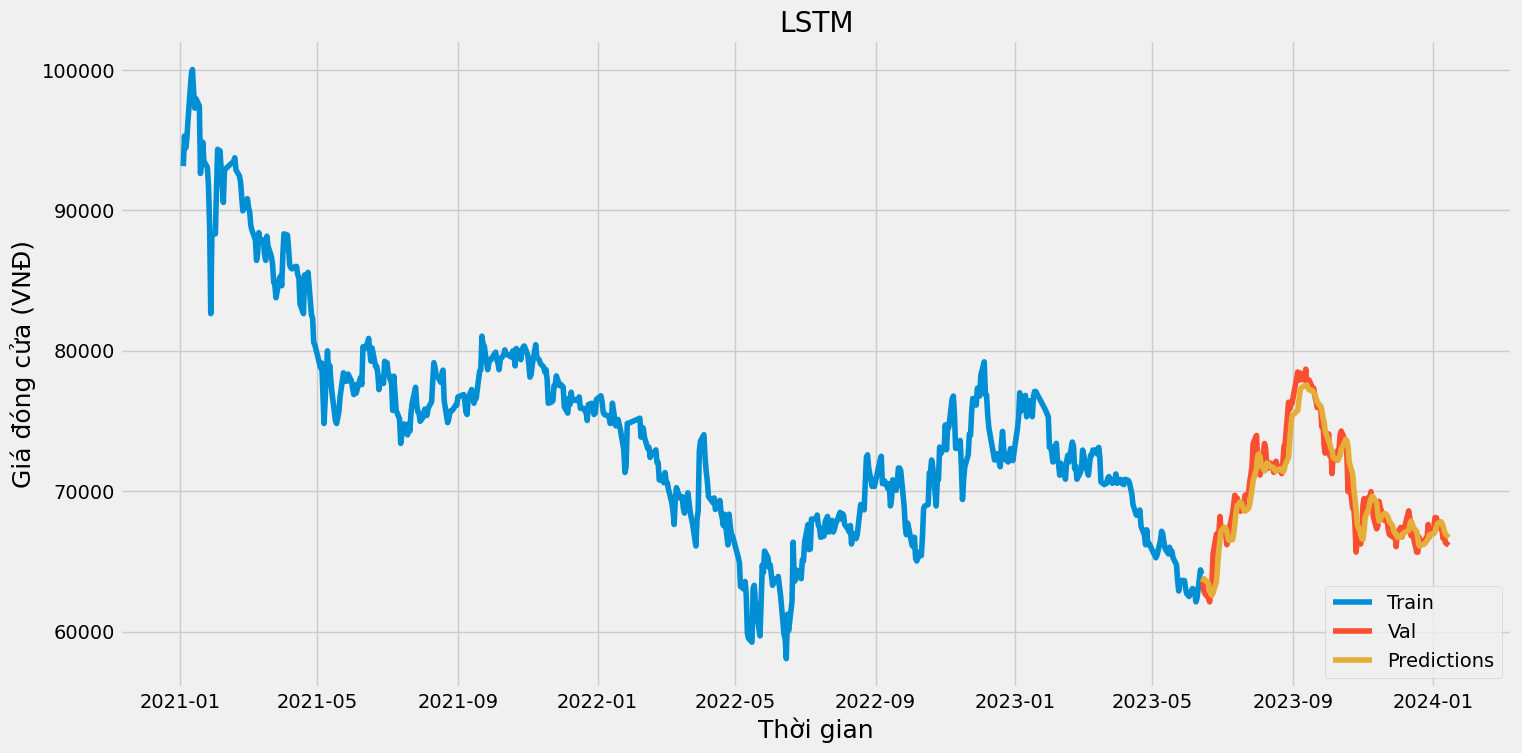

In [ ]:
#Vẽ đồ thị
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize
plt.figure(figsize=(16,8))
plt.title('LSTM')
plt.xlabel('Thời gian', fontsize=18)
plt.ylabel('Giá đóng cửa (VNĐ)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Bảng so sánh giá thực tế và giá dự đoán
valid

,close,Predictions
time,,
2023-06-14,63640,63523.492188
2023-06-15,62890,63776.601562
2023-06-16,62690,63690.488281
2023-06-19,62400,63416.363281
2023-06-20,62120,63057.519531
...,...,...
2024-01-09,67230,67734.523438
2024-01-10,66640,67526.046875
2024-01-11,67030,67181.078125


# Thử dự đoán giá tương lai và so sánh với giá ngày cuối

In [ ]:
new_df =  stock_historical_data(symbol='TCB',
                            start_date="2021-01-01",
                            end_date='2024-01-15',
                            resolution='1D', type='stock', source='DNSE')
new_df

,time,open,high,low,close,volume,ticker
0,2021-01-04,32000,33400,31900,33000,18607800,TCB
1,2021-01-05,32750,33350,32549,33050,14280100,TCB
2,2021-01-06,33200,34100,32950,33200,20222300,TCB
3,2021-01-07,33750,34600,33400,34600,16387200,TCB
4,2021-01-08,35000,36250,34900,35700,16947900,TCB
...,...,...,...,...,...,...,...
754,2024-01-09,34000,34500,33800,34500,6900500,TCB
755,2024-01-10,34550,34700,34250,34400,7189800,TCB
756,2024-01-11,34300,34600,33800,34150,6731000,TCB
757,2024-01-12,33850,34700,33550,34650,10186600,TCB


In [ ]:
new_data = pd.DataFrame(new_df,columns=['time','close'])
new_data.index = new_data.time
new_data.drop('time',axis=1,inplace=True)
new_data

,close
time,
2021-01-04,33000
2021-01-05,33050
2021-01-06,33200
2021-01-07,34600
2021-01-08,35700
...,...
2024-01-09,34500
2024-01-10,34400
2024-01-11,34150


In [ ]:
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

In [ ]:
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
pred_price = final_model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 59ms/step
[[34912.016]]


In [ ]:
new_df =  stock_historical_data(symbol='TCB',
                            start_date="2024-01-16",
                            end_date='2024-01-16',
                            resolution='1D', type='stock', source='DNSE')
new_df['close']

0    34150
Name: close, dtype: int64